In [3]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [4]:
website_url= rq.get('https://cuestionpublica.com/discurso-de-posesion-gustavo-petro/').text #Bring the data from the target URL

In [10]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data

20196

In [12]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [13]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [25]:
stop_words = ["aqui","aquí","través","toda","todas","debe","hoy","cada","solo","hora","ser","si","xa0", "xa0'","año", "mil", "millones", "pesos", "ciento", "El", "En", "Aceptar", "políticas", "de", "privacidad", "y", "tratamiento", "datos", "personales"] + stop_words_es #Adding aditional StopWords who causes noise in the result image
#initiate world cloud object
petro_wc = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop_words
)
# generate the word cloud
petro_wc.generate(data)

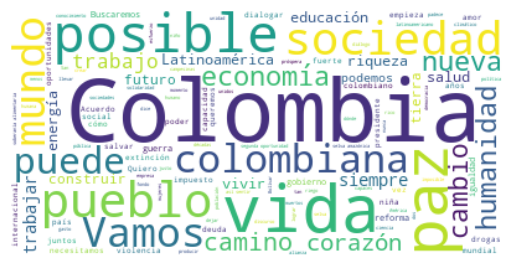

In [26]:
# display the word cloud
plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

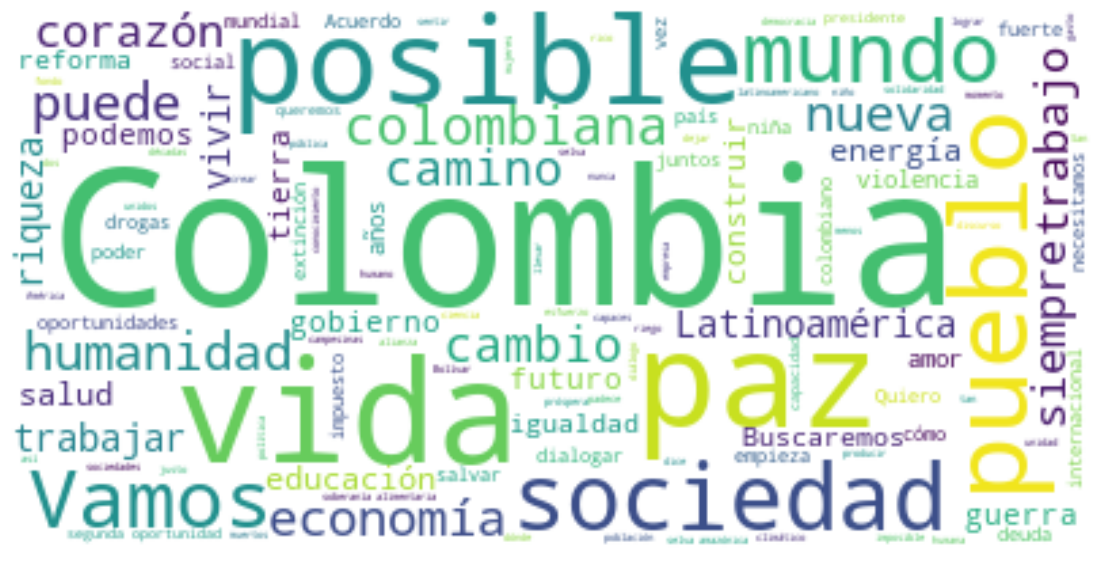

In [27]:
# re-generate the word cloud
petro_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#!pip install wget
import wget
url = 'https://i.ibb.co/bJHc7S0/colombia-bn.jpg'
filename = wget.download(url)

print(filename)

colombia-bn (1).jpg


In [29]:
col_mask = np.array(Image.open('colombia-bn.jpg'))

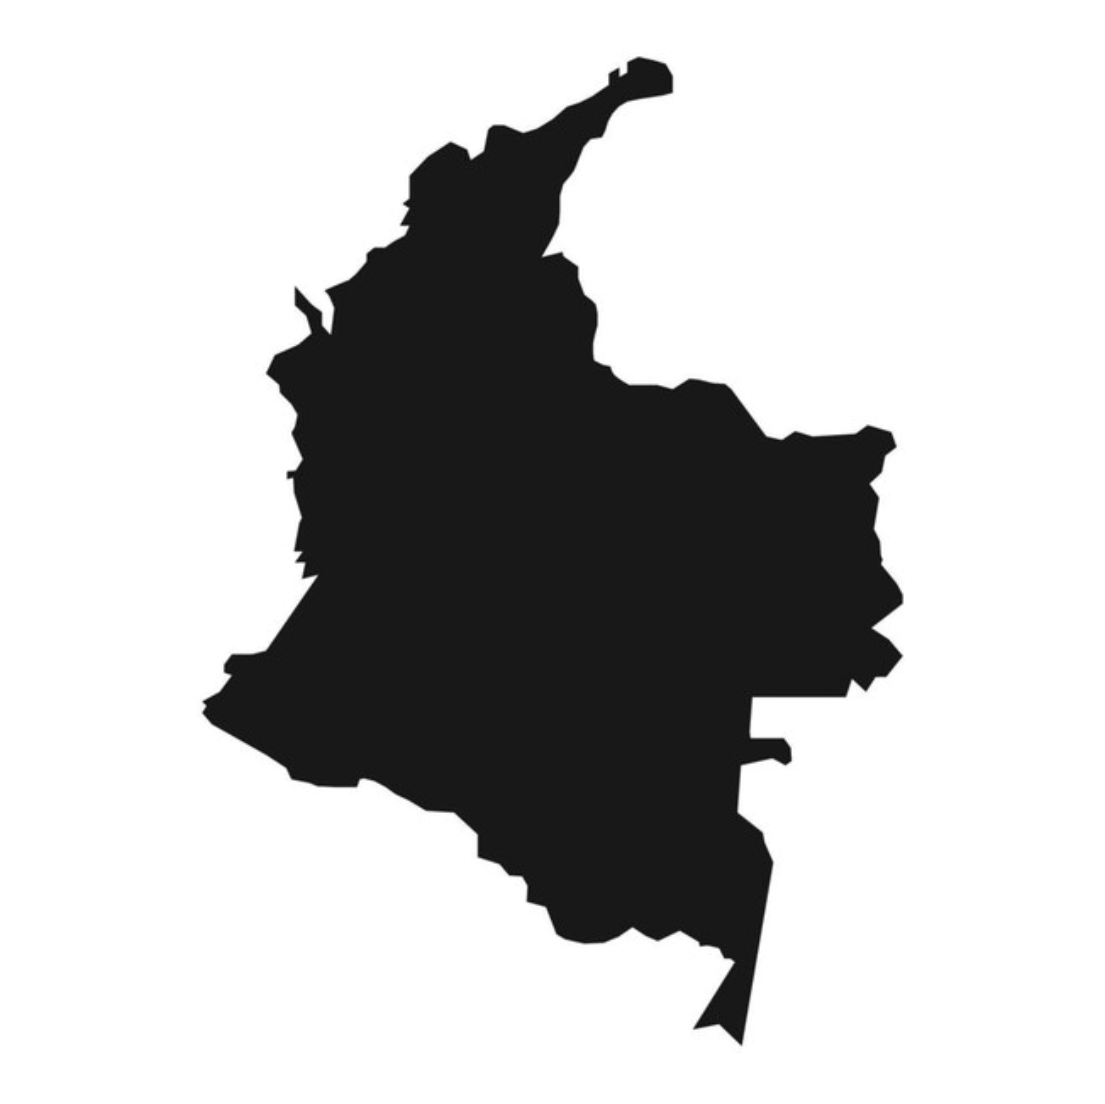

In [30]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(col_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

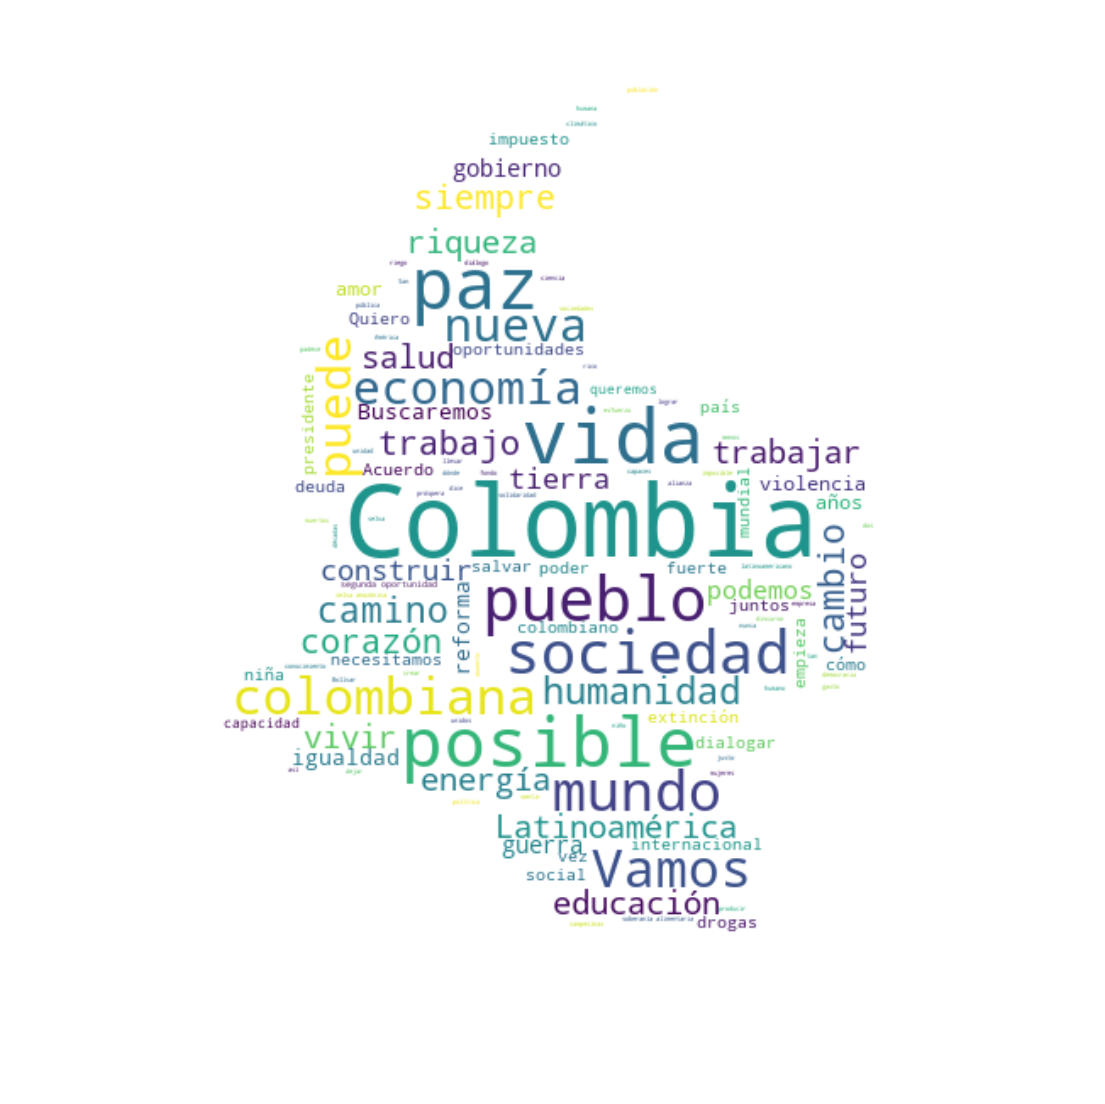

In [42]:
# instantiate a word cloud object
petro_wc = WordCloud(background_color='white', max_words=2000, mask=col_mask, stopwords=stop_words)

# generate the word cloud
petro_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()